# CS381 Data Analytics Final Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
from sklearn import metrics
import random

In [5]:
# The best performance is the last one of the logistic regression

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [6]:
df = pd.read_csv("adult_income2.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project
* The second and third performance model with have 2 extra points capped at 20 points for the whole final project.




### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [7]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


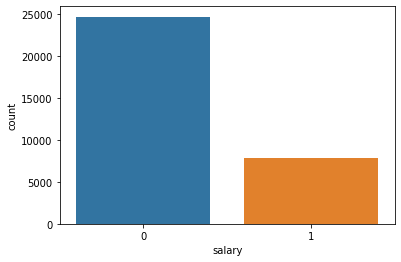

In [8]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

In [9]:
df.shape

(32570, 15)

In [10]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

delete rows with ? and duplicate rows

In [11]:
to_drop = ['?']
df = df[~df['age'].isin(to_drop)]
df = df[~df['workclass'].isin(to_drop)]
df = df[~df['fnlwgt'].isin(to_drop)]
df = df[~df['occupation'].isin(to_drop)]
df = df[~df['native-country'].isin(to_drop)]

In [12]:
df.shape

(30171, 15)

In [13]:
df = df.drop_duplicates()
print("After duplicates removal: ", df.shape)

After duplicates removal:  (30148, 15)


check outlier

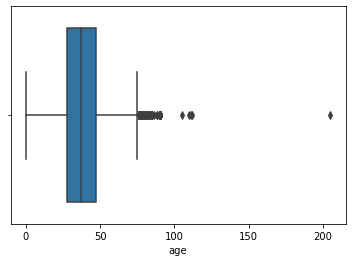

In [14]:
sns.boxplot(x=df['age'])

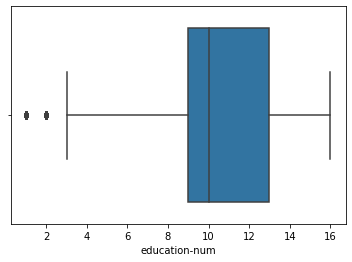

In [15]:
sns.boxplot(x=df['education-num'])

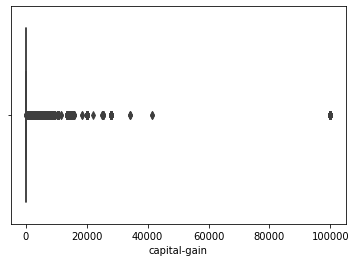

In [16]:
sns.boxplot(x=df['capital-gain'])

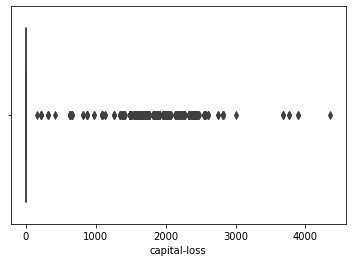

In [17]:
sns.boxplot(x=df['capital-loss'])

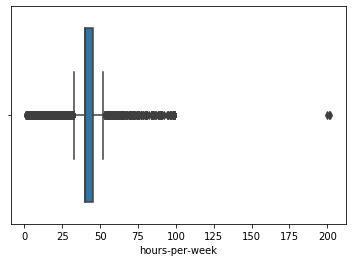

In [18]:
sns.boxplot(x=df['hours-per-week'])

In [19]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,30148.000000,3.014800e+04,30148.000000,30148.000000,30148.000000,30148.000000,30148.000000
mean,38.453662,1.898262e+05,10.122628,1092.514960,88.584583,40.950444,0.249005
std,13.192920,1.057058e+05,2.548522,7408.028624,404.713763,12.082933,0.432444
min,0.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176248e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376255e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,205.000000,1.484705e+06,16.000000,99999.000000,4356.000000,202.000000,1.000000


In [20]:
print("Before ", df.shape)
df = df[ (df['age'] < 75) & (df['education-num'] > 6) & (df['hours-per-week'] < 175)]
print("After ", df.shape)

Before  (30148, 15)
After  (27670, 15)


In [21]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,27670.000000,2.767000e+04,27670.000000,27670.000000,27670.000000,27670.000000,27670.000000
mean,37.925045,1.885888e+05,10.580051,1153.237080,90.682544,41.197326,0.265161
std,12.438043,1.050174e+05,2.031895,7620.685306,408.194358,11.855550,0.441427
min,0.000000,1.376900e+04,7.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.172100e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.777270e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.358940e+05,13.000000,0.000000,0.000000,45.000000,1.000000
max,74.000000,1.484705e+06,16.000000,99999.000000,3900.000000,99.000000,1.000000


In [22]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.069601,0.135448,0.087955,0.067070,0.135698,0.277718
fnlwgt,-0.069601,1.000000,-0.017319,0.001240,-0.006229,-0.025925,-0.001348
education-num,0.135448,-0.017319,1.000000,0.138490,0.089519,0.163220,0.339690
capital-gain,0.087955,0.001240,0.138490,1.000000,-0.033620,0.083222,0.219530
capital-loss,0.067070,-0.006229,0.089519,-0.033620,1.000000,0.054483,0.151125
hours-per-week,0.135698,-0.025925,0.163220,0.083222,0.054483,1.000000,0.230600
salary,0.277718,-0.001348,0.339690,0.219530,0.151125,0.230600,1.000000


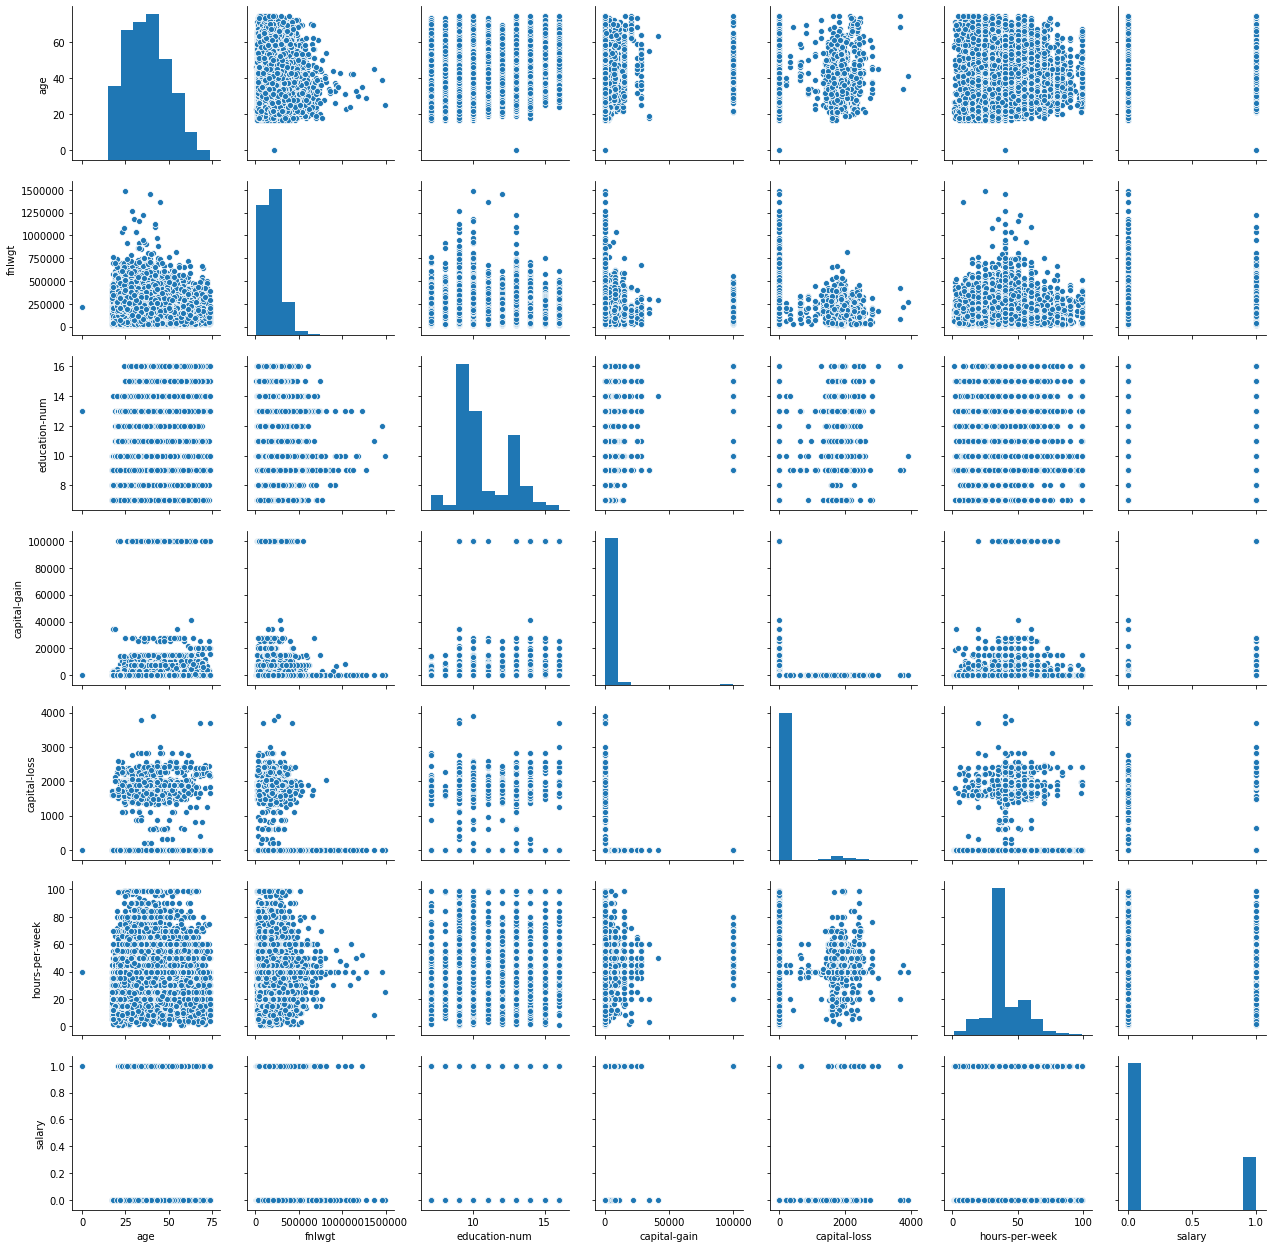

In [23]:
sns.pairplot(df)

# Some analysis 

In [24]:
df.groupby('salary').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
salary,,,,,,
0,35.850096,188673.852014,10.165445,148.302710,53.626912,39.555107
1,43.675344,188353.172414,11.729045,3938.207851,193.374676,45.748399


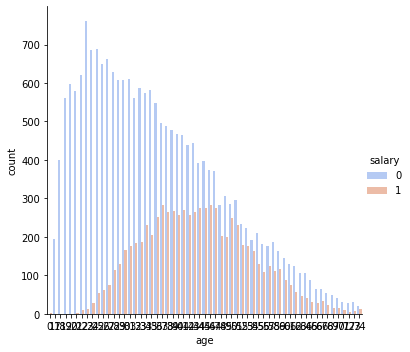

In [25]:
sns.factorplot('age', kind='count', hue='salary', data=df,palette='coolwarm')

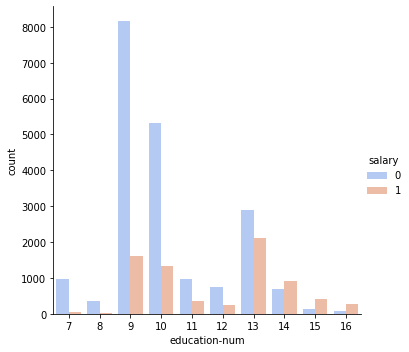

In [26]:
sns.factorplot('education-num', kind='count', hue='salary', data=df,palette='coolwarm')

# Building Models: logistic regression model

## Building without capital-gain and capital-loss

In [27]:
df1 = df[['age','education-num','hours-per-week', 'salary']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('salary',axis=1), 
                                                    df1['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predictions = model.predict(X_test)

In [30]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      4078
           1       0.59      0.32      0.41      1456

    accuracy                           0.76      5534
   macro avg       0.69      0.62      0.63      5534
weighted avg       0.74      0.76      0.74      5534

0.7623780267437658


## Building with capital-gain and capital-loss

In [31]:
df2 = df[['age','education-num','capital-gain','capital-loss','hours-per-week', 'salary']]
df2.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('salary',axis=1), 
                                                    df2['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions = model.predict(X_test)

In [34]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4078
           1       0.71      0.41      0.52      1456

    accuracy                           0.80      5534
   macro avg       0.76      0.67      0.70      5534
weighted avg       0.79      0.80      0.78      5534

0.8003252620166245


check model performance

In [35]:
Y_pred = model.predict(X_test)

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.19967473798337548
Mean Squared Error: 0.19967473798337548
Root Mean Squared Error: 0.4468497935362346
R-squared: -0.02989473131086684


I decided I shall inlcude capital-gain and capital-loss

### Include workclass

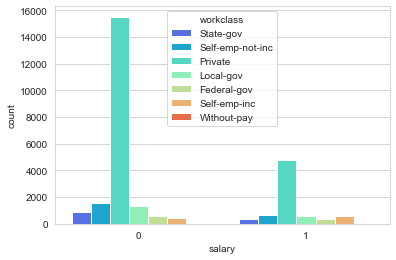

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='workclass',data=df,palette='rainbow')

In [38]:
work = pd.get_dummies(df['workclass'],drop_first=True)

In [39]:
df3 = pd.concat([df2, work], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('salary',axis=1), 
                                                    df3['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4078
           1       0.71      0.41      0.52      1456

    accuracy                           0.80      5534
   macro avg       0.77      0.68      0.70      5534
weighted avg       0.79      0.80      0.78      5534

0.8014094687387062


In [41]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.1985905312612938
Mean Squared Error: 0.1985905312612938
Root Mean Squared Error: 0.4456349753568427
R-squared: -0.02430254272456356


### include marital-status

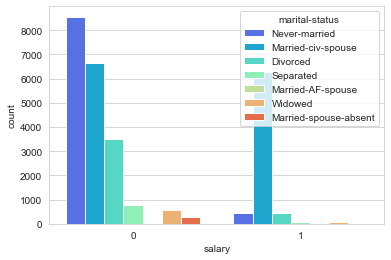

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='marital-status',data=df,palette='rainbow')

In [43]:
marriage = pd.get_dummies(df['marital-status'],drop_first=True)

In [44]:
df4 = pd.concat([df2, marriage], axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df4.drop('salary',axis=1), 
                                                    df4['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4078
           1       0.72      0.58      0.64      1456

    accuracy                           0.83      5534
   macro avg       0.79      0.75      0.77      5534
weighted avg       0.82      0.83      0.82      5534

0.8310444524756053


In [46]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.16895554752439465
Mean Squared Error: 0.16895554752439465
Root Mean Squared Error: 0.41104202646979376
R-squared: 0.1285506119677281


### include occupation

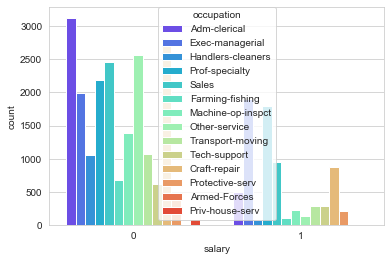

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='occupation',data=df,palette='rainbow')

In [48]:
occ = pd.get_dummies(df['occupation'],drop_first=True)

In [49]:
df5 = pd.concat([df2, occ], axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df5.drop('salary',axis=1), 
                                                    df5['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4078
           1       0.70      0.44      0.54      1456

    accuracy                           0.80      5534
   macro avg       0.76      0.69      0.71      5534
weighted avg       0.79      0.80      0.79      5534

0.8028550777014818


In [51]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.19714492229851824
Mean Squared Error: 0.19714492229851824
Root Mean Squared Error: 0.44401004751978107
R-squared: -0.01684629127615911


### include relationship

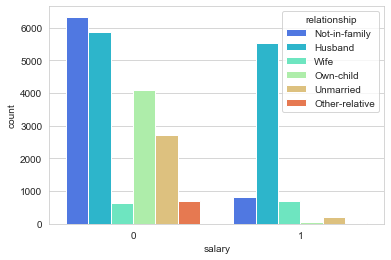

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='relationship',data=df,palette='rainbow')

In [53]:
relation = pd.get_dummies(df['relationship'],drop_first=True)
df6 = pd.concat([df2, relation], axis=1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df6.drop('salary',axis=1), 
                                                    df6['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4078
           1       0.71      0.58      0.64      1456

    accuracy                           0.83      5534
   macro avg       0.79      0.75      0.76      5534
weighted avg       0.82      0.83      0.82      5534

0.8279725334297072


In [55]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.17202746657029275
Mean Squared Error: 0.17202746657029275
Root Mean Squared Error: 0.4147619396356092
R-squared: 0.11270607763986862


### include race 

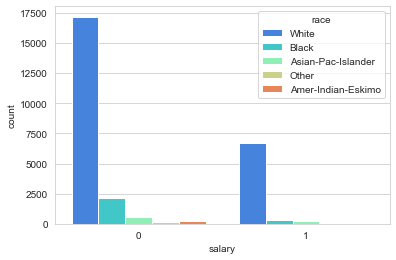

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='race',data=df,palette='rainbow')

In [57]:
race = pd.get_dummies(df['race'],drop_first=True)
df7 = pd.concat([df2, race], axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df7.drop('salary',axis=1), 
                                                    df7['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4078
           1       0.71      0.40      0.51      1456

    accuracy                           0.80      5534
   macro avg       0.76      0.67      0.69      5534
weighted avg       0.79      0.80      0.78      5534

0.7988796530538489


In [59]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.20112034694615108
Mean Squared Error: 0.20112034694615108
Root Mean Squared Error: 0.4484644321974164
R-squared: -0.03735098275927129


### include sex

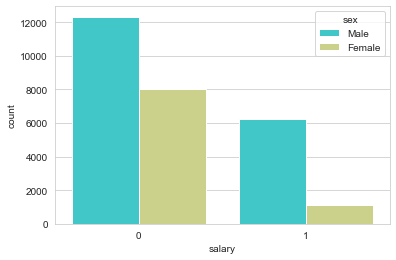

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='sex',data=df,palette='rainbow')

In [61]:
sex = pd.get_dummies(df['sex'],drop_first=True)
df8 = pd.concat([df2, sex], axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df8.drop('salary',axis=1), 
                                                    df8['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4078
           1       0.72      0.45      0.56      1456

    accuracy                           0.81      5534
   macro avg       0.77      0.69      0.72      5534
weighted avg       0.80      0.81      0.79      5534

0.8097217202746657


In [63]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.1902782797253343
Mean Squared Error: 0.1902782797253343
Root Mean Squared Error: 0.4362089862959431
R-squared: 0.018570903103762193


### include nation 

In [64]:
nation = pd.get_dummies(df['native-country'],drop_first=True)
df9 = pd.concat([df2, nation], axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df9.drop('salary',axis=1), 
                                                    df9['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4078
           1       0.71      0.40      0.52      1456

    accuracy                           0.80      5534
   macro avg       0.77      0.67      0.70      5534
weighted avg       0.79      0.80      0.78      5534

0.8006866642573184


In [66]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.1993133357426816
Mean Squared Error: 0.1993133357426816
Root Mean Squared Error: 0.4464452214355996
R-squared: -0.028030668448765672


### include all 

In [67]:
df10 = pd.concat([df2, work, marriage, occ, relation, race, sex, nation], axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df10.drop('salary',axis=1), 
                                                    df10['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4078
           1       0.70      0.61      0.65      1456

    accuracy                           0.83      5534
   macro avg       0.78      0.76      0.77      5534
weighted avg       0.82      0.83      0.82      5534

0.8281532345500542


In [69]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.1718467654499458
Mean Squared Error: 0.1718467654499458
Root Mean Squared Error: 0.41454404524724003
R-squared: 0.11363810907091909


I noticed that the marriage/relation into features can have higher accuracy, so I combined them

# The best performance

In [70]:
df11 = pd.concat([df2, marriage, relation], axis=1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df11.drop('salary',axis=1), 
                                                    df11['salary'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4078
           1       0.72      0.58      0.64      1456

    accuracy                           0.83      5534
   macro avg       0.79      0.75      0.76      5534
weighted avg       0.82      0.83      0.82      5534

0.828876039031442


In [72]:
Y_pred = model.predict(X_test)

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.171123960968558
Mean Squared Error: 0.171123960968558
Root Mean Squared Error: 0.4136713199734277
R-squared: 0.11736623479512143


In [74]:
import random

Trial 0, R-squared: 0.13208615337536056,  Slope: [[ 2.46912608e-02  3.46722641e-01  3.10695268e-04  6.37533631e-04
   2.70417531e-02  7.50928403e-02  2.21833046e-01 -3.32923843e-01
  -7.13400890e-01 -6.40015314e-01 -3.52912694e-01 -1.48757820e+00
  -1.29968764e+00 -2.35959785e+00 -1.99841029e+00  3.89508733e-01]], Intercept: [-6.57236679],  
Trial 1, R-squared: 0.13464712144426694,  Slope: [[ 1.57363889e-02  3.03603131e-01  3.10865361e-04  6.40465552e-04
   2.04017700e-02  9.45303867e-02  1.55332993e-01 -2.64086036e-01
  -1.11356930e+00 -5.74572043e-01 -2.90478058e-01 -1.19569392e+00
  -9.78980758e-01 -1.98506404e+00 -1.75254263e+00  2.10819152e-01]], Intercept: [-5.39410709],  
Trial 2, R-squared: 0.1378277043558428,  Slope: [[ 1.40499318e-02  2.93431231e-01  3.22160627e-04  6.15959903e-04
   1.83590980e-02  6.11396873e-02  3.19620282e-01 -2.55380170e-01
  -1.17747177e+00 -6.38723388e-01 -3.10999726e-01 -1.20297278e+00
  -9.40858720e-01 -1.97580848e+00 -1.77518716e+00  1.67671533e-01]

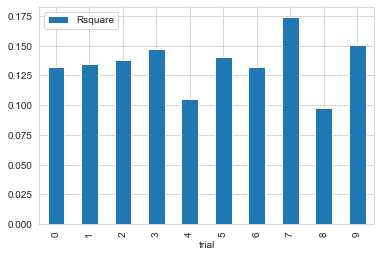

In [75]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df11.drop('salary',axis=1), 
                                                    df11['salary'], test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

# Building Models: SVM

In [76]:
# features = ['age','education-num','capital-gain','capital-loss','hours-per-week', 'salary']
# Need to assign max_iter a value, and the performance is no better than the features w/o capital-gain and capital-loss

Reload the data

In [77]:
orig_df = pd.read_csv("adult_income2.csv")
orig_df['salary'] = orig_df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
orig_df.dropna(inplace=True)
to_drop = ['?']
orig_df = orig_df[~orig_df['age'].isin(to_drop)]
orig_df = orig_df[~orig_df['workclass'].isin(to_drop)]
orig_df = orig_df[~orig_df['fnlwgt'].isin(to_drop)]
orig_df = orig_df[~orig_df['occupation'].isin(to_drop)]
orig_df = orig_df[~orig_df['native-country'].isin(to_drop)]
orig_df = orig_df.drop_duplicates()
orig_df = orig_df[ (orig_df['age'] < 75) & (orig_df['education-num'] > 6) & (orig_df['hours-per-week'] < 175)]
orig_df.shape

(27670, 15)

In [78]:
features = ['age','education-num','hours-per-week', 'salary']

### include work 

In [79]:
work = pd.get_dummies(orig_df['workclass'],drop_first=True)
df1 = orig_df
df1 = pd.concat([orig_df[features], work], axis=1)
df1.head()

,age,education-num,hours-per-week,salary,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,13,40,0,0,0,0,0,1,0
1,50,13,13,0,0,0,0,1,0,0
2,38,9,40,0,0,1,0,0,0,0
3,53,7,40,0,0,1,0,0,0,0
4,28,13,40,0,0,1,0,0,0,0


In [80]:
X = df1.drop('salary',axis=1)
y = df1['salary']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [82]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      4035
           1       0.67      0.26      0.37      1499

    accuracy                           0.77      5534
   macro avg       0.73      0.61      0.61      5534
weighted avg       0.75      0.77      0.72      5534

0.7652692446693169


In [83]:
model = svm.SVC(kernel='rbf', gamma = 2**-5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4035
           1       0.65      0.36      0.46      1499

    accuracy                           0.77      5534
   macro avg       0.72      0.64      0.66      5534
weighted avg       0.76      0.77      0.75      5534

0.7734007950849295


### include marriage 

In [84]:
marriage = pd.get_dummies(orig_df['marital-status'],drop_first=True)
df2 = orig_df
df2 = pd.concat([orig_df[features], marriage], axis=1)
df2.head()

,age,education-num,hours-per-week,salary,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39,13,40,0,0,0,0,1,0,0
1,50,13,13,0,0,1,0,0,0,0
2,38,9,40,0,0,0,0,0,0,0
3,53,7,40,0,0,1,0,0,0,0
4,28,13,40,0,0,1,0,0,0,0


In [85]:
X = df2.drop('salary',axis=1)
y = df2['salary']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [87]:
model2 = svm.SVC(kernel='linear')
model2.fit(X_train,y_train)
predictions = model2.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      4083
           1       0.69      0.45      0.54      1451

    accuracy                           0.80      5534
   macro avg       0.76      0.69      0.71      5534
weighted avg       0.79      0.80      0.79      5534

0.8028550777014818


### include occupation 

In [88]:
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
df3 = orig_df
df3 = pd.concat([orig_df[features], occ], axis=1)
df3.head()

,age,education-num,hours-per-week,salary,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,13,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,13,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,38,9,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53,7,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28,13,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [89]:
X = df3.drop('salary',axis=1)
y = df3['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [90]:
model3 = svm.SVC(kernel='linear')
model3.fit(X_train,y_train)
predictions = model3.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4087
           1       0.64      0.34      0.44      1447

    accuracy                           0.78      5534
   macro avg       0.72      0.64      0.65      5534
weighted avg       0.76      0.78      0.75      5534

0.7782797253342971


### include relation

In [91]:
relation = pd.get_dummies(orig_df['relationship'],drop_first=True)
df4 = orig_df
df4 = pd.concat([orig_df[features], relation], axis=1)
df4.head()

,age,education-num,hours-per-week,salary,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,13,40,0,1,0,0,0,0
1,50,13,13,0,0,0,0,0,0
2,38,9,40,0,1,0,0,0,0
3,53,7,40,0,0,0,0,0,0
4,28,13,40,0,0,0,0,0,1


In [92]:
X = df4.drop('salary',axis=1)
y = df4['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [93]:
model4 = svm.SVC(kernel='linear')
model4.fit(X_train,y_train)
predictions = model4.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4022
           1       0.70      0.48      0.57      1512

    accuracy                           0.80      5534
   macro avg       0.76      0.70      0.72      5534
weighted avg       0.79      0.80      0.79      5534

0.8024936754607879


### include race 

In [94]:
race = pd.get_dummies(orig_df['race'],drop_first=True)
df5 = orig_df
df5 = pd.concat([orig_df[features], race], axis=1)
df5.head()

,age,education-num,hours-per-week,salary,Asian-Pac-Islander,Black,Other,White
0,39,13,40,0,0,0,0,1
1,50,13,13,0,0,0,0,1
2,38,9,40,0,0,0,0,1
3,53,7,40,0,0,1,0,0
4,28,13,40,0,0,1,0,0


In [95]:
X = df5.drop('salary',axis=1)
y = df5['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [96]:
model5 = svm.SVC(kernel='linear')
model5.fit(X_train,y_train)
predictions = model5.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4106
           1       0.63      0.29      0.40      1428

    accuracy                           0.77      5534
   macro avg       0.71      0.62      0.63      5534
weighted avg       0.75      0.77      0.74      5534

0.7732200939645826


### include sex 

In [97]:
sex = pd.get_dummies(orig_df['sex'],drop_first=True)
df6 = orig_df
df6 = pd.concat([orig_df[features], sex], axis=1)
df6.head()

,age,education-num,hours-per-week,salary,Male
0,39,13,40,0,1
1,50,13,13,0,1
2,38,9,40,0,1
3,53,7,40,0,1
4,28,13,40,0,0


In [98]:
X = df6.drop('salary',axis=1)
y = df6['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [99]:
model6 = svm.SVC(kernel='linear')
model6.fit(X_train,y_train)
predictions = model6.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4105
           1       0.65      0.39      0.49      1429

    accuracy                           0.79      5534
   macro avg       0.73      0.66      0.68      5534
weighted avg       0.77      0.79      0.77      5534

0.7889410914347669


### include nation 

In [100]:
nation = pd.get_dummies(orig_df['native-country'],drop_first=True)
df7 = orig_df
df7 = pd.concat([orig_df[features], nation], axis=1)
df7.head()

,age,education-num,hours-per-week,salary,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X = df7.drop('salary',axis=1)
y = df7['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [102]:
model7 = svm.SVC(kernel='linear')
model7.fit(X_train,y_train)
predictions = model7.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4082
           1       0.66      0.28      0.39      1452

    accuracy                           0.77      5534
   macro avg       0.72      0.61      0.63      5534
weighted avg       0.75      0.77      0.74      5534

0.7730393928442356


### include all 

In [103]:
df8 = orig_df
df8 = pd.concat([orig_df[features], work, marriage, occ, relation, race, sex, nation], axis=1)

In [104]:
X = df8.drop('salary',axis=1)
y = df8['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [105]:
model8 = svm.SVC(kernel='linear')
model8.fit(X_train,y_train)
predictions = model8.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4091
           1       0.68      0.59      0.64      1443

    accuracy                           0.82      5534
   macro avg       0.77      0.75      0.76      5534
weighted avg       0.82      0.82      0.82      5534

0.8223707986989519


In [106]:
Y_pred = model8.predict(X_test)

In [107]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.17762920130104806
Mean Squared Error: 0.17762920130104806
Root Mean Squared Error: 0.42146079450056567
R-squared: 0.07849676952585805


Trial 0, R-squared: 0.0788397564921034,  Slope: [[ 0.01453686  0.18098185  0.01419656 -0.30241042 -0.19441373  0.03613611
  -0.46347701 -0.46936325 -0.81507437  1.09049482  1.04233033  0.18293317
  -0.16497251  0.09890987  0.15065009  0.         -0.2918851   0.91282339
  -0.66838285 -0.44298196 -0.37087417 -0.51741485 -1.          0.76016354
   0.62906334  0.61695887  0.87361164 -0.3725639  -0.42380214 -0.52506213
  -0.64502103 -0.50328548  0.51474057  0.47994388  0.31232965 -0.52005203
   0.32727439  0.36057142  0.28818823  0.         -1.          0.48251048
  -0.37582005 -0.5613438  -0.02789442  0.29367744  0.49157732  0.33833783
  -0.80328101  0.          0.          0.          0.          0.14700535
   0.61441866 -0.10050791  0.10947583  0.19120439  0.50287979  0.
   0.05686741 -0.29636565  0.06679312 -0.03441718 -0.94800038 -0.43918414
   0.34356372  0.10604961  0.37384266  0.          0.         -1.17300514
  -0.11252283 -0.20636197 -0.57743317  0.26533317 -0.32727056  0.3116832

Trial 8, R-squared: 0.09017673653925207,  Slope: [[ 0.0190626   0.23351767  0.01723874 -0.42799732 -0.26446402 -0.02940054
  -0.62989971 -0.59409248 -1.          0.8761254   0.88082661  0.01107054
  -0.26751463  0.06214556  0.13067152  0.         -0.28931028  0.66854697
  -0.80574739 -0.54838613 -0.43552442 -0.65364578 -0.82872139  0.46507444
   0.30780182  0.31774037  0.60428865 -0.41640995 -0.40650524 -0.39180662
  -0.696002   -0.51411538  0.78629785  0.50146753  0.41311839 -0.11036176
   0.41785417  0.46368702  0.43004014 -0.11667915 -0.91961638  0.55989616
  -0.612602   -0.03903036 -0.09503135  0.10874963  0.81963748  0.43344654
  -0.3888895  -0.27974414  0.10343375  0.          0.          0.08297892
  -0.5436997  -0.29058604  0.0861812   0.04958879  0.62570363 -0.62889167
   0.24714039 -0.97439341 -0.12755388 -0.09280179 -0.86922305 -0.71095801
   0.36327411  0.01100561  0.3597671  -0.05259212  0.         -0.73348566
   0.19301228 -0.19426845 -0.75889076  0.25254478 -0.60988851  

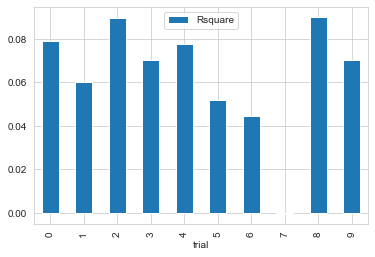

In [110]:
import random
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df8.drop('salary',axis=1), 
                                                    df8['salary'], test_size=0.2, random_state = random.randint(1,1000))
    model8 = svm.SVC(kernel='linear')
    model8.fit(X_train, Y_train)
    Y_pred = model8.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model8.coef_, model.intercept_))
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

# Decusion tree

reoload the data

In [5]:
orig_df = pd.read_csv("adult_income2.csv")
orig_df['salary'] = orig_df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
orig_df.dropna(inplace=True)
to_drop = ['?']
orig_df = orig_df[~orig_df['age'].isin(to_drop)]
orig_df = orig_df[~orig_df['workclass'].isin(to_drop)]
orig_df = orig_df[~orig_df['fnlwgt'].isin(to_drop)]
orig_df = orig_df[~orig_df['occupation'].isin(to_drop)]
orig_df = orig_df[~orig_df['native-country'].isin(to_drop)]
orig_df = orig_df.drop_duplicates()
orig_df = orig_df[ (orig_df['age'] < 75) & (orig_df['education-num'] > 6) & (orig_df['hours-per-week'] < 175)]
orig_df.shape

(27670, 15)

In [6]:
features = ['age','education-num','capital-gain','capital-loss','hours-per-week', 'salary']

### include work 

In [7]:
work = pd.get_dummies(orig_df['workclass'],drop_first=True)
df1 = orig_df
df1 = pd.concat([orig_df[features], work], axis=1)
df1.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,13,2174,0,40,0,0,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0


In [8]:
X = df1.drop('salary',axis=1)
y = df1['salary']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [28]:
model = DecisionTreeClassifier(max_depth=8,criterion='gini')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))


[[3907  135]
 [ 848  644]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4042
           1       0.83      0.43      0.57      1492

    accuracy                           0.82      5534
   macro avg       0.82      0.70      0.73      5534
weighted avg       0.82      0.82      0.80      5534

0.8223707986989519


In [11]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.2191904589808457
Mean Squared Error: 0.2191904589808457
Root Mean Squared Error: 0.4681778070144352
R-squared: -0.10521006466377703


### include marriage 

In [29]:
marriage = pd.get_dummies(orig_df['marital-status'],drop_first=True)
df2 = orig_df
df2 = pd.concat([orig_df[features], marriage], axis=1)
df2.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39,13,2174,0,40,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,1,0,0,0,0
2,38,9,0,0,40,0,0,0,0,0,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0


In [30]:
X = df2.drop('salary',axis=1)
y = df2['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [37]:
model2 = DecisionTreeClassifier(max_depth=12, criterion='gini')
model2.fit(X_train,y_train)
predictions = model2.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[3892  210]
 [ 635  797]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4102
           1       0.79      0.56      0.65      1432

    accuracy                           0.85      5534
   macro avg       0.83      0.75      0.78      5534
weighted avg       0.84      0.85      0.84      5534

0.8473075533068305


In [15]:
Y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.21828695337911094
Mean Squared Error: 0.21828695337911094
Root Mean Squared Error: 0.4672118934478348
R-squared: -0.12096273312755468


In [38]:
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
df3 = orig_df
df3 = pd.concat([orig_df[features], occ], axis=1)
df3.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,13,2174,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,38,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28,13,0,0,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [39]:
X = df3.drop('salary',axis=1)
y = df3['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [40]:
model3 = DecisionTreeClassifier(max_depth=14, criterion='gini')
model3.fit(X_train,y_train)
predictions = model3.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[3761  327]
 [ 681  765]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4088
           1       0.70      0.53      0.60      1446

    accuracy                           0.82      5534
   macro avg       0.77      0.72      0.74      5534
weighted avg       0.81      0.82      0.81      5534

0.8178532706902782


### include relation 

In [19]:
relation = pd.get_dummies(orig_df['relationship'],drop_first=True)
df4 = orig_df
df4 = pd.concat([orig_df[features], relation], axis=1)
df4.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,13,2174,0,40,0,1,0,0,0,0
1,50,13,0,0,13,0,0,0,0,0,0
2,38,9,0,0,40,0,1,0,0,0,0
3,53,7,0,0,40,0,0,0,0,0,0
4,28,13,0,0,40,0,0,0,0,0,1


In [20]:
X = df4.drop('salary',axis=1)
y = df4['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [21]:
model4 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model4.fit(X_train,y_train)
predictions = model4.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[4053   12]
 [1203  266]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4065
           1       0.96      0.18      0.30      1469

    accuracy                           0.78      5534
   macro avg       0.86      0.59      0.59      5534
weighted avg       0.82      0.78      0.72      5534

0.7804481387784604


### include race 

In [22]:
race = pd.get_dummies(orig_df['race'],drop_first=True)
df5 = orig_df
df5 = pd.concat([orig_df[features], race], axis=1)
df5.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Asian-Pac-Islander,Black,Other,White
0,39,13,2174,0,40,0,0,0,0,1
1,50,13,0,0,13,0,0,0,0,1
2,38,9,0,0,40,0,0,0,0,1
3,53,7,0,0,40,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0


In [23]:
X = df5.drop('salary',axis=1)
y = df5['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [24]:
model5 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model5.fit(X_train,y_train)
predictions = model5.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[4033   20]
 [1219  262]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4053
           1       0.93      0.18      0.30      1481

    accuracy                           0.78      5534
   macro avg       0.85      0.59      0.58      5534
weighted avg       0.81      0.78      0.71      5534

0.7761113118901337


### include sex 

In [25]:
sex = pd.get_dummies(orig_df['sex'],drop_first=True)
df6 = orig_df
df6 = pd.concat([orig_df[features], sex], axis=1)
df6.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Male
0,39,13,2174,0,40,0,1
1,50,13,0,0,13,0,1
2,38,9,0,0,40,0,1
3,53,7,0,0,40,0,1
4,28,13,0,0,40,0,0


In [26]:
X = df6.drop('salary',axis=1)
y = df6['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [27]:
model6 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model6.fit(X_train,y_train)
predictions = model6.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[4080   13]
 [1153  288]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4093
           1       0.96      0.20      0.33      1441

    accuracy                           0.79      5534
   macro avg       0.87      0.60      0.60      5534
weighted avg       0.83      0.79      0.73      5534

0.7893024936754608


### include nation 

In [28]:
nation = pd.get_dummies(orig_df['native-country'],drop_first=True)
df7 = orig_df
df7 = pd.concat([orig_df[features], nation], axis=1)
df7.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Canada,China,Columbia,Cuba,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = df7.drop('salary',axis=1)
y = df7['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [30]:
model7 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model7.fit(X_train,y_train)
predictions = model7.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[4071   11]
 [1197  255]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4082
           1       0.96      0.18      0.30      1452

    accuracy                           0.78      5534
   macro avg       0.87      0.59      0.58      5534
weighted avg       0.82      0.78      0.72      5534

0.781713046620889


### include all 

In [31]:
df8 = orig_df
df8 = pd.concat([orig_df[features],  work, marriage, occ, relation, race, sex, nation], axis=1)

In [32]:
X = df8.drop('salary',axis=1)
y = df8['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [33]:
model8 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model8.fit(X_train,y_train)
predictions = model8.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[3849  208]
 [ 830  647]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4057
           1       0.76      0.44      0.55      1477

    accuracy                           0.81      5534
   macro avg       0.79      0.69      0.72      5534
weighted avg       0.81      0.81      0.79      5534

0.8124322370798699


In [34]:
Y_pred = model8.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-squared:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 0.1875677629201301
Mean Squared Error: 0.1875677629201301
Root Mean Squared Error: 0.43309094070429377
R-squared: 0.04137002354231489


# Naive Bayes Classifier

In [14]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report

reload again

In [15]:
orig_df = pd.read_csv("adult_income2.csv")
orig_df['salary'] = orig_df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
orig_df.dropna(inplace=True)
to_drop = ['?']
orig_df = orig_df[~orig_df['age'].isin(to_drop)]
orig_df = orig_df[~orig_df['workclass'].isin(to_drop)]
orig_df = orig_df[~orig_df['fnlwgt'].isin(to_drop)]
orig_df = orig_df[~orig_df['occupation'].isin(to_drop)]
orig_df = orig_df[~orig_df['native-country'].isin(to_drop)]
orig_df = orig_df.drop_duplicates()
orig_df = orig_df[ (orig_df['age'] < 75) & (orig_df['education-num'] > 6) & (orig_df['hours-per-week'] < 175)]
orig_df.shape

(27670, 15)

In [16]:
features = ['age','education-num','capital-gain','capital-loss','hours-per-week', 'salary']

### include work 

In [17]:
work = pd.get_dummies(orig_df['workclass'],drop_first=True)
df1 = orig_df
df1 = pd.concat([orig_df[features], work], axis=1)
df1.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,13,2174,0,40,0,0,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0


In [18]:
X = df1.drop('salary',axis=1)
y = df1['salary']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [20]:
model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [21]:
print (classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      4035
           1       0.66      0.21      0.32      1499

    accuracy                           0.76      5534
   macro avg       0.71      0.59      0.59      5534
weighted avg       0.74      0.76      0.71      5534

0.7569569931333574


### include marriage

In [31]:
marriage = pd.get_dummies(orig_df['marital-status'],drop_first=True)
df2 = orig_df
df2 = pd.concat([orig_df[features], marriage], axis=1)
df2.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39,13,2174,0,40,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,1,0,0,0,0
2,38,9,0,0,40,0,0,0,0,0,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0


In [32]:
X = df2.drop('salary',axis=1)
y = df2['salary']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [35]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)
print (classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      4034
           1       0.63      0.22      0.33      1500

    accuracy                           0.75      5534
   macro avg       0.70      0.59      0.59      5534
weighted avg       0.73      0.75      0.71      5534

0.7533429707264185


###  include occupation

In [36]:
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
df3 = orig_df
df3 = pd.concat([orig_df[features], occ], axis=1)
df3.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,13,2174,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,38,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28,13,0,0,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
X = df3.drop('salary',axis=1)
y = df3['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [38]:
model3 = MultinomialNB()
model3.fit(X_train, y_train)
predictions = model3.predict(X_test)
print (classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      4073
           1       0.63      0.21      0.31      1461

    accuracy                           0.76      5534
   macro avg       0.70      0.58      0.58      5534
weighted avg       0.73      0.76      0.71      5534

0.7591254065775208


### include relation

In [39]:
relation = pd.get_dummies(orig_df['relationship'],drop_first=True)
df4 = orig_df
df4 = pd.concat([orig_df[features], relation], axis=1)
df4.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,13,2174,0,40,0,1,0,0,0,0
1,50,13,0,0,13,0,0,0,0,0,0
2,38,9,0,0,40,0,1,0,0,0,0
3,53,7,0,0,40,0,0,0,0,0,0
4,28,13,0,0,40,0,0,0,0,0,1


In [40]:
X = df4.drop('salary',axis=1)
y = df4['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [41]:
model4 = MultinomialNB()
model4.fit(X_train, y_train)
predictions = model4.predict(X_test)
print (classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      4064
           1       0.63      0.20      0.30      1470

    accuracy                           0.76      5534
   macro avg       0.70      0.58      0.58      5534
weighted avg       0.73      0.76      0.71      5534

0.7565955908926635


### include race 

In [42]:
race = pd.get_dummies(orig_df['race'],drop_first=True)
df5 = orig_df
df5 = pd.concat([orig_df[features], race], axis=1)
df5.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Asian-Pac-Islander,Black,Other,White
0,39,13,2174,0,40,0,0,0,0,1
1,50,13,0,0,13,0,0,0,0,1
2,38,9,0,0,40,0,0,0,0,1
3,53,7,0,0,40,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0


In [43]:
X = df5.drop('salary',axis=1)
y = df5['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [44]:
model5 = MultinomialNB()
model5.fit(X_train, y_train)
predictions = model5.predict(X_test)
print (classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      4092
           1       0.69      0.21      0.33      1442

    accuracy                           0.77      5534
   macro avg       0.74      0.59      0.59      5534
weighted avg       0.76      0.77      0.72      5534

0.7706902782797254


###  include sex

In [45]:
sex = pd.get_dummies(orig_df['sex'],drop_first=True)
df6 = orig_df
df6 = pd.concat([orig_df[features], sex], axis=1)
df6.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Male
0,39,13,2174,0,40,0,1
1,50,13,0,0,13,0,1
2,38,9,0,0,40,0,1
3,53,7,0,0,40,0,1
4,28,13,0,0,40,0,0


In [46]:
X = df6.drop('salary',axis=1)
y = df6['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [47]:
model6 = MultinomialNB()
model6.fit(X_train, y_train)
predictions = model6.predict(X_test)
print (classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4094
           1       0.64      0.22      0.33      1440

    accuracy                           0.77      5534
   macro avg       0.71      0.59      0.59      5534
weighted avg       0.74      0.77      0.72      5534

0.7656306469100108


### include nation 

In [48]:
nation = pd.get_dummies(orig_df['native-country'],drop_first=True)
df7 = orig_df
df7 = pd.concat([orig_df[features], nation], axis=1)
df7.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,Canada,China,Columbia,Cuba,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = df7.drop('salary',axis=1)
y = df7['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [50]:
model7 = MultinomialNB()
model7.fit(X_train, y_train)
predictions = model7.predict(X_test)
print (classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4101
           1       0.64      0.22      0.33      1433

    accuracy                           0.77      5534
   macro avg       0.71      0.59      0.59      5534
weighted avg       0.74      0.77      0.72      5534

0.7667148536320926
